In [ ]:
train_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

test_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

In [ ]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(train_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_train_data.csv", index=False)

final_df = pd.DataFrame()
for url in tqdm(test_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_test_data.csv", index=False)

del final_df

100%|██████████| 2/2 [00:57<00:00, 28.56s/it]


In [ ]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_train_data.csv')
test_data = pd.read_csv('/content/ctu_13_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [ ]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [ ]:
data.shape

(4632758, 15)

In [ ]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [ ]:
data['Label'].unique()

array(['flow=Background-UDP-Established', 'flow=Background',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=Background-TCP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-Attempt',
       'flow=From-Normal-V42-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-NTP-Established-1',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics3',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-google-analytics2',
       'flow=Background-google-analytics6', 'flow=From-Normal-V42-Jist',
       'flow=Background-google-webmail', 'flow=Background-TCP-Attempt',
       'flow=Background-google-analytics12',
       'flow=Background-google-analytics1',
       'flow=Background-google-analytics13',
       'flow=Background-google-analytics14', 'flow=To-Background-Jist',
       'flow=Background-ajax.google', 'flow=From-Nor

In [ ]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))
test_data['Label'] = test_data['Label'].apply(lambda x:convertlabel(x))

In [ ]:
data['Label'].value_counts()

,count
Label,
0,4570856
1,61902


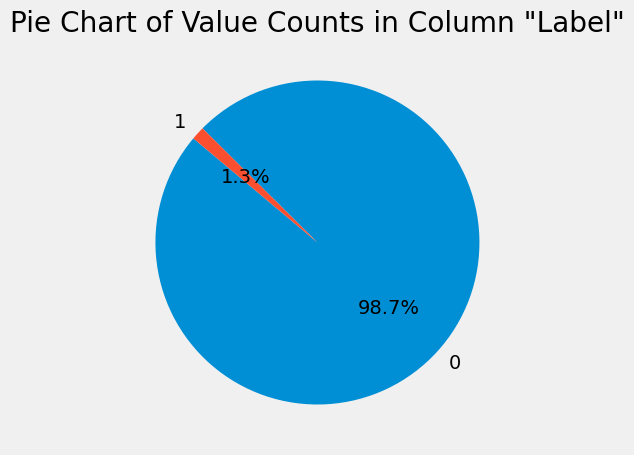

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [ ]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)

data = pd.concat([data1,data2])

th = 1000
data1 = test_data[test_data['Label'] == 0].head(th)
data2 = test_data[test_data['Label'] == 1].head(th)

test_data = pd.concat([data1,data2])

test_data.shape

(2000, 15)

In [ ]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000


In [ ]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)
test_data.to_csv('/content/ctu_13_sample_test_data.csv', index=False)

In [ ]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
test_data = pd.read_csv('/content/ctu_13_sample_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


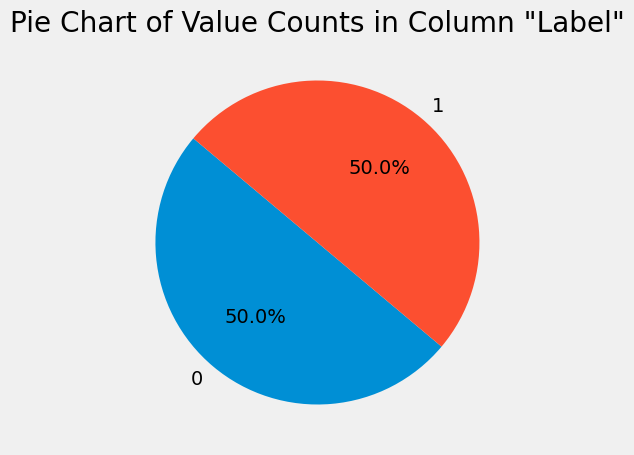

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [ ]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [ ]:
data.isna().mean() * 100

,0
StartTime,0.00
Dur,0.00
Proto,0.00
SrcAddr,0.00
Sport,0.20
Dir,0.00
DstAddr,0.00
Dport,0.20
State,0.00
sTos,0.15


In [ ]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


In [ ]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])

test_data = test_data[pd.to_numeric(test_data['Sport'], errors='coerce').notnull()]
test_data['Sport'] = pd.to_numeric(test_data['Sport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [ ]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])

test_data = test_data[pd.to_numeric(test_data['Dport'], errors='coerce').notnull()]
test_data['Dport'] = pd.to_numeric(test_data['Dport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [ ]:
test_data = test_data.fillna(value=0.0)
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [ ]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1986.000000,1986.000000
mean,252.644352,20164.177241,5244.753273,0.003021,0.001007,11.793555,3.238300e+03,603.634441,0.503525
std,781.002110,22194.887426,11009.618904,0.095178,0.044879,209.744774,5.694102e+04,6846.838298,0.500114
min,0.000000,80.000000,22.000000,0.000000,0.000000,1.000000,6.000000e+01,60.000000,0.000000
25%,0.000842,2079.000000,53.000000,0.000000,0.000000,2.000000,1.860000e+02,74.250000,0.000000
50%,0.104451,4471.500000,53.000000,0.000000,0.000000,2.000000,2.220000e+02,83.500000,1.000000
75%,9.012749,42179.250000,13094.000000,0.000000,0.000000,4.000000,4.247500e+02,186.000000,1.000000
max,3599.904785,65535.000000,65520.000000,3.000000,2.000000,9017.000000,2.411173e+06,270060.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  1986 non-null   object 
 1   Dur        1986 non-null   float64
 2   Proto      1986 non-null   object 
 3   SrcAddr    1986 non-null   object 
 4   Sport      1986 non-null   int64  
 5   Dir        1986 non-null   object 
 6   DstAddr    1986 non-null   object 
 7   Dport      1986 non-null   int64  
 8   State      1986 non-null   object 
 9   sTos       1986 non-null   float64
 10  dTos       1986 non-null   float64
 11  TotPkts    1986 non-null   int64  
 12  TotBytes   1986 non-null   int64  
 13  SrcBytes   1986 non-null   int64  
 14  Label      1986 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 248.2+ KB


In [ ]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 10:54:21.131583,18.612793,tcp,147.32.86.187,50939,->,74.125.232.193,80,FSA_FSA,0.0,0.0,7,432,246,0
1,2011/08/11 11:21:16.477874,0.000156,udp,147.32.84.138,38195,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
2,2011/08/11 11:45:17.915012,0.000214,udp,147.32.84.138,37595,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
3,2011/08/11 10:07:09.884344,0.000283,udp,147.32.84.138,54073,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
4,2011/08/10 10:19:00.514352,0.699948,tcp,70.37.98.60,53357,->,147.32.85.100,9644,S_RA,0.0,0.0,4,252,132,0


In [ ]:
data['Proto'].value_counts()

,count
Proto,
udp,1330
tcp,653
rtcp,2
rtp,1


In [ ]:
data['Dir'].value_counts()

,count
Dir,
<->,1220
->,759
?>,4
<?>,3


In [ ]:
data['State'].value_counts()

,count
State,
CON,1220
S_,376
FSPA_FSPA,122
INT,113
S_RA,37
FSA_FSA,21
SRPA_FSPA,21
SRPA_SPA,15
FSRPA_FSPA,14


In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

test_data['StartTime'] = pd.to_datetime(test_data['StartTime'])
test_data['Hour'] = test_data['StartTime'].dt.hour
test_data['Minute'] = test_data['StartTime'].dt.minute
test_data['Second'] = test_data['StartTime'].dt.second
test_data['DayOfWeek'] = test_data['StartTime'].dt.dayofweek
test_data['Day'] = test_data['StartTime'].dt.day

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  1978 non-null   datetime64[ns]
 1   Dur        1978 non-null   float64       
 2   Proto      1978 non-null   object        
 3   SrcAddr    1978 non-null   object        
 4   Sport      1978 non-null   int64         
 5   Dir        1978 non-null   object        
 6   DstAddr    1978 non-null   object        
 7   Dport      1978 non-null   int64         
 8   State      1978 non-null   object        
 9   sTos       1978 non-null   float64       
 10  dTos       1978 non-null   float64       
 11  TotPkts    1978 non-null   int64         
 12  TotBytes   1978 non-null   int64         
 13  SrcBytes   1978 non-null   int64         
 14  Label      1978 non-null   int64         
 15  Hour       1978 non-null   int32         
 16  Minute     1978 non-null   int32         
 17  

In [ ]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

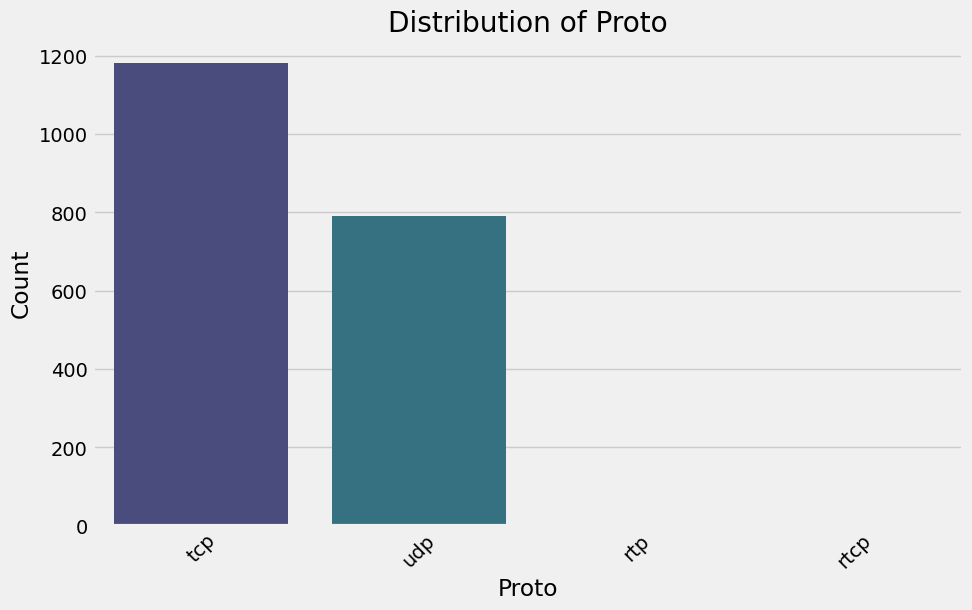

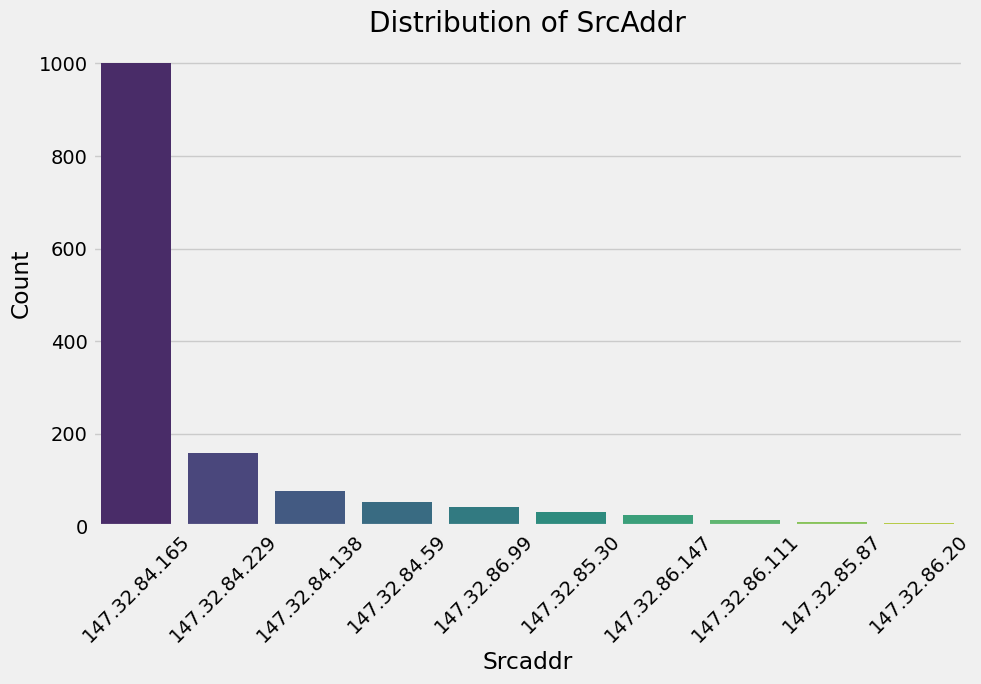

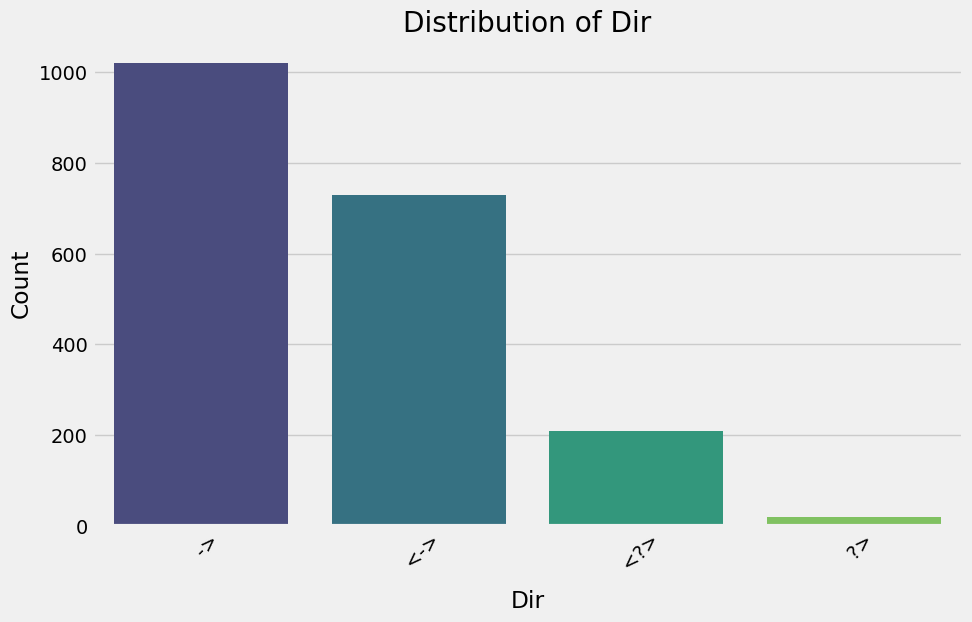

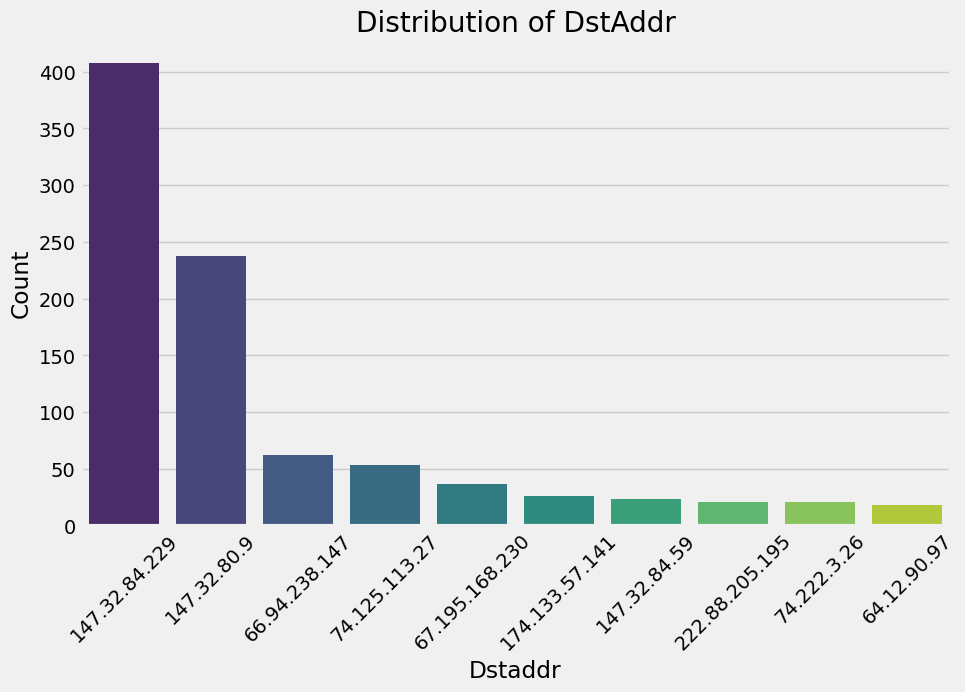

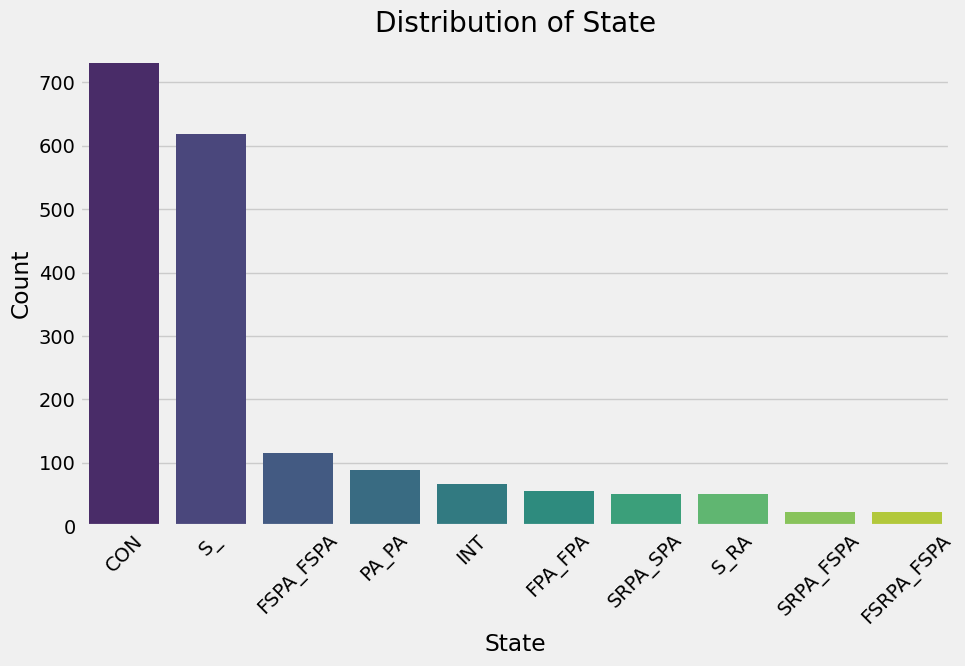

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

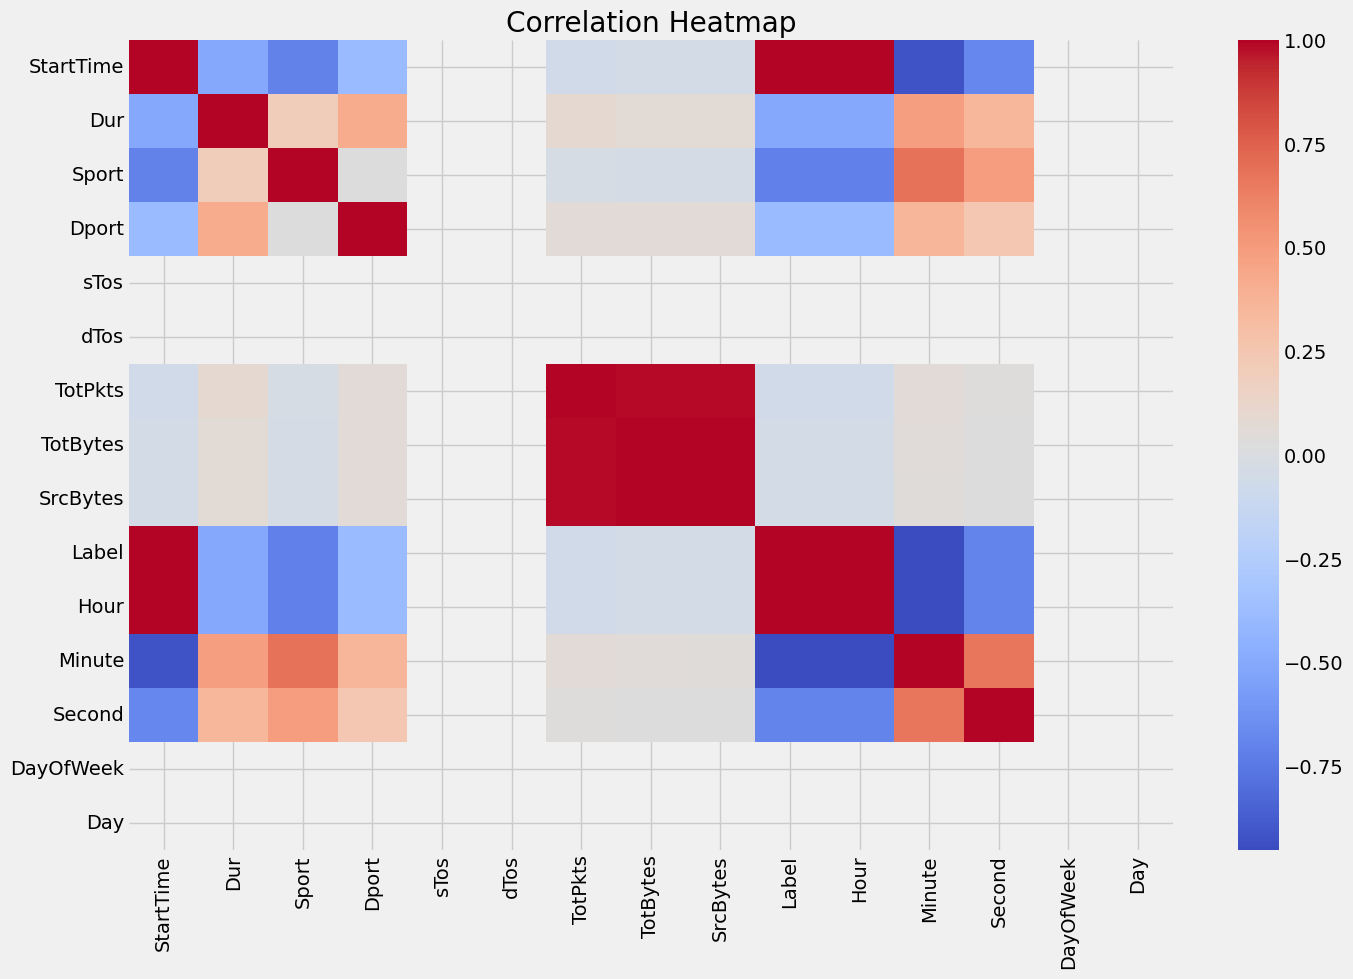

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Minute,0.483567
Dport,0.420100
Second,0.352530
Sport,0.193129
TotPkts,0.086390
TotBytes,0.067320
SrcBytes,0.064389
StartTime,-0.507546
Hour,-0.509439


In [ ]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.507546,-0.707276,-0.395293,NaN,NaN,-0.059833,-0.050050,-0.048149,0.995438,0.995438,-0.918372,-0.684269,NaN,NaN
Dur,-0.507546,1.000000,0.193129,0.420100,NaN,NaN,0.086390,0.067320,0.064389,-0.509439,-0.509439,0.483567,0.352530,NaN,NaN
Sport,-0.707276,0.193129,1.000000,0.025645,NaN,NaN,-0.022770,-0.029484,-0.031119,-0.711446,-0.711446,0.680123,0.496740,NaN,NaN
Dport,-0.395293,0.420100,0.025645,1.000000,NaN,NaN,0.058918,0.056742,0.057120,-0.393563,-0.393563,0.363714,0.252076,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.059833,0.086390,-0.022770,0.058918,NaN,NaN,1.000000,0.988019,0.985888,-0.059983,-0.059983,0.056812,0.036743,NaN,NaN
TotBytes,-0.050050,0.067320,-0.029484,0.056742,NaN,NaN,0.988019,1.000000,0.999717,-0.050249,-0.050249,0.047822,0.031076,NaN,NaN
SrcBytes,-0.048149,0.064389,-0.031119,0.057120,NaN,NaN,0.985888,0.999717,1.000000,-0.048344,-0.048344,0.046027,0.029742,NaN,NaN
Label,0.995438,-0.509439,-0.711446,-0.393563,NaN,NaN,-0.059983,-0.050249,-0.048344,1.000000,1.000000,-0.951911,-0.692905,NaN,NaN


In [ ]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [ ]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,1978


In [ ]:
data = data.drop(columns=constant_columns)
test_data = test_data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,875,413,0,9,46,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,135,75,0,9,46,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,120,60,0,9,46,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,180,120,0,9,46,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,2856,1596,0,9,46,53


In [ ]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [ ]:
if 'Label' in high_corr_features:
    high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [ ]:
data = data.drop(columns=high_corr_features)
test_data = test_data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


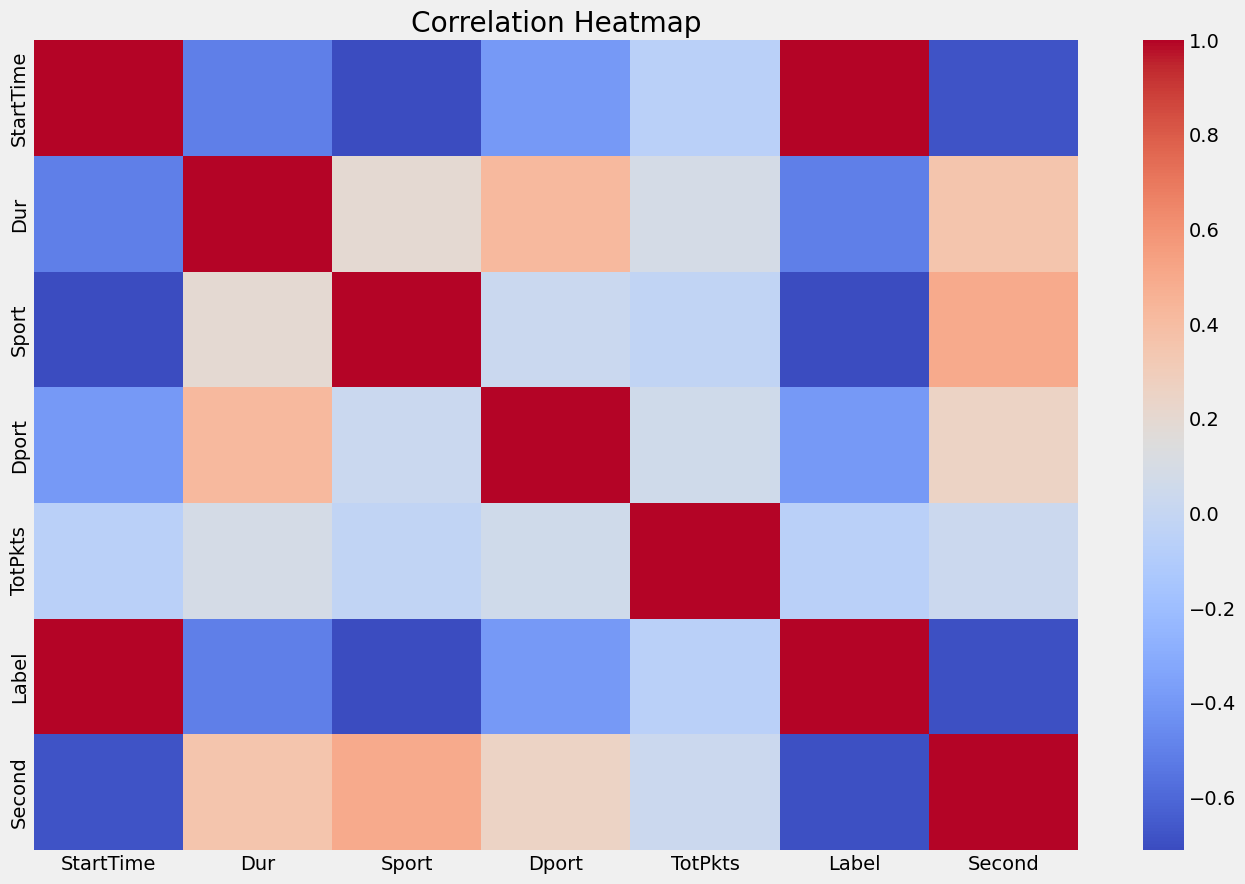

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


In [ ]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [ ]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

# Convert Source and Destination IP addresses to numerical values using hashing
test_data['SrcAddr'] = test_data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
test_data['DstAddr'] = test_data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
test_data['SrcAddr'] = test_data['SrcAddr'].fillna(-1).astype(int)
test_data['DstAddr'] = test_data['DstAddr'].fillna(-1).astype(int)

In [ ]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [ ]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

test_data = test_data.drop(columns=['StartTime'])
test_data = test_data.drop(columns=['SrcAddr','Sport'])

In [ ]:
X = data.drop(columns=['Label'])
y = data[['Label']]

X_test = test_data.drop(columns=['Label'])
y_test = test_data[['Label']]

In [ ]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,udp,<->,58085,13363,CON,12,53
1,0.000883,udp,<->,58085,13363,CON,2,53
2,0.000326,tcp,<?>,53756,2063,FA_A,2,53
3,0.056966,tcp,<?>,3682,21857,FA_FA,3,53
4,3427.768066,udp,<->,58085,13363,CON,42,53


In [ ]:
categorical_cols = ['Proto', 'State', 'Dir']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X_test[categorical_cols] = le.transform(X_test[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,3.0,2.0,58085,13363,1.0,12,53
1,0.000883,3.0,2.0,58085,13363,1.0,2,53
2,0.000326,2.0,3.0,53756,2063,3.0,2,53
3,0.056966,2.0,3.0,3682,21857,4.0,3,53
4,3427.768066,3.0,2.0,58085,13363,1.0,42,53


In [ ]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
processed_data = pd.concat([X,y],axis=1)
test_processed_data = pd.concat([X_test,y_test],axis=1)
processed_data.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second,Label
0,3550.182373,3.0,2.0,58085,13363,1.0,12,53,0
1,0.000883,3.0,2.0,58085,13363,1.0,2,53,0
2,0.000326,2.0,3.0,53756,2063,3.0,2,53,0
3,0.056966,2.0,3.0,3682,21857,4.0,3,53,0
4,3427.768066,3.0,2.0,58085,13363,1.0,42,53,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)
test_processed_data = scaler.transform(test_processed_data)

In [ ]:
processed_data

array([[ 2.30610462,  1.21501014,  0.82077815, ..., -0.06045801,
         0.6212719 , -1.01118489],
       [-0.52734983,  1.21501014,  0.82077815, ..., -0.06271857,
         0.6212719 , -1.01118489],
       [-0.52735028, -0.79611125,  1.69739757, ..., -0.06271857,
         0.6212719 , -1.01118489],
       ...,
       [-0.52067944, -0.79611125, -0.9324607 , ..., -0.06249252,
        -0.74979497,  0.98893883],
       [-0.52446946, -0.79611125, -0.9324607 , ..., -0.06113618,
        -0.74979497,  0.98893883],
       [-0.5204572 , -0.79611125, -0.9324607 , ..., -0.06249252,
        -0.74979497,  0.98893883]])

In [ ]:
processed_data.shape

(1978, 9)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 32  # Dimension of noise vector
clip_value = 0.01  # Weight clipping parameter

# Custom Wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return tf.keras.backend.mean(y_true * y_pred)

# Generator remains similar
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        # Output dimension matches processed_data; using sigmoid assuming data is scaled [0,1]
        layers.Dense(processed_data.shape[1], activation='sigmoid')
    ])
    return model

# Critic (formerly Discriminator) with linear output
def build_critic():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=processed_data.shape[1]),
        layers.Dense(64, activation='relu'),
        # No activation here (linear output) for Wasserstein loss
        layers.Dense(1)
    ])
    return model

# Initialize models
generator = build_generator()
critic = build_critic()


In [ ]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,593 (45.29 KB)

 Trainable params: 11,593 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
critic.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

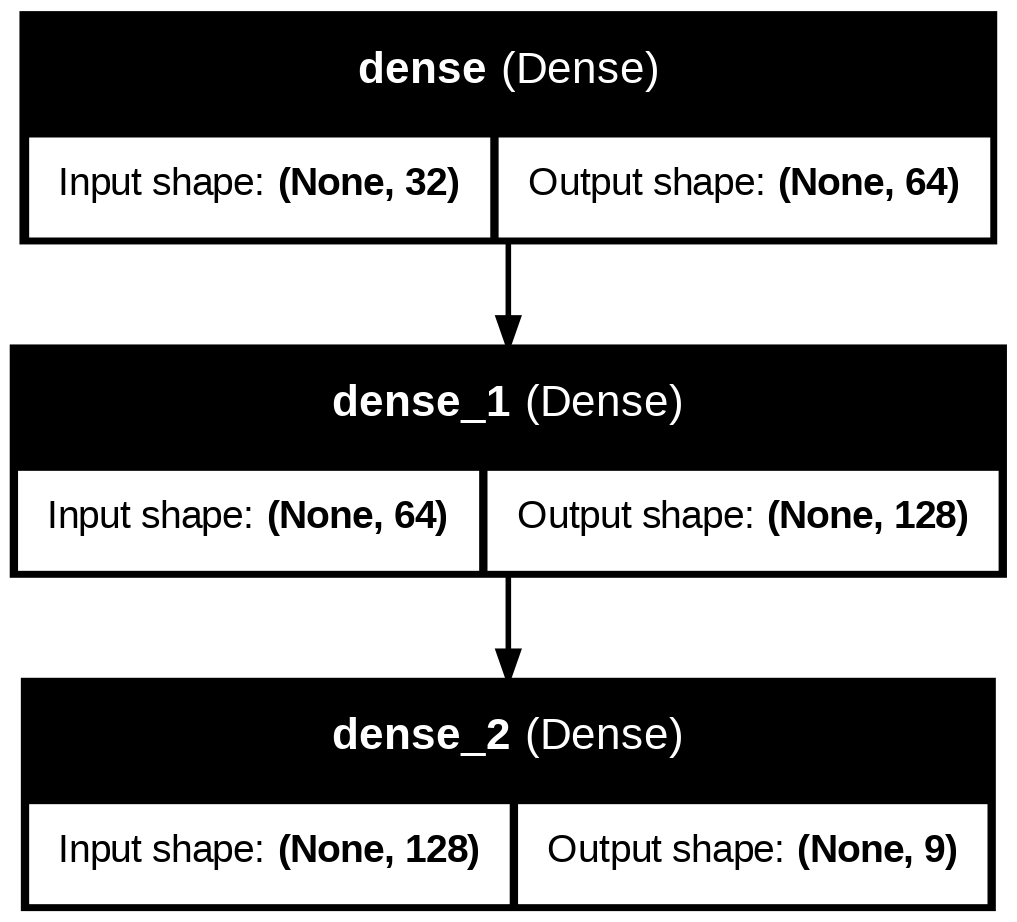

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

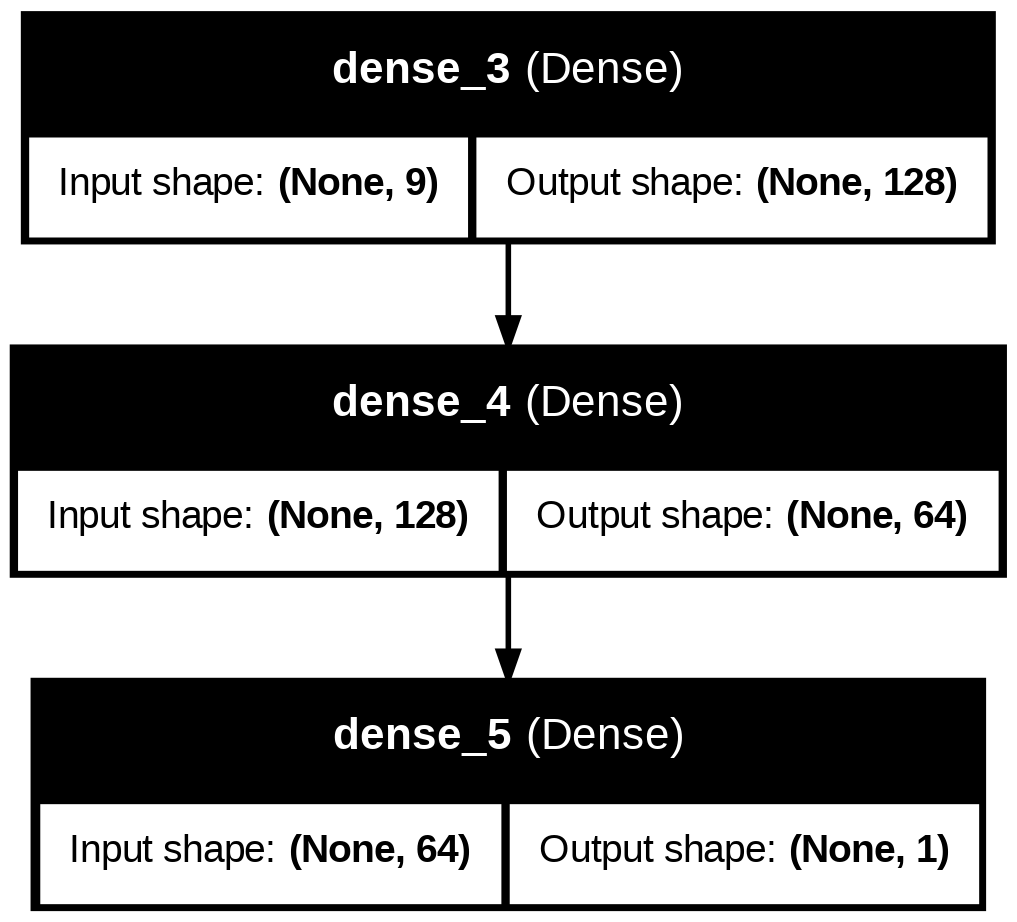

In [ ]:
plot_model(critic, to_file='critic_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the critic using the Wasserstein loss and RMSprop optimizer
critic.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
                 loss=wasserstein_loss)

# Build the combined GAN model (Generator + Critic)
# Freeze the critic when training the generator
critic.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = critic(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
            loss=wasserstein_loss)

In [ ]:
# Training parameters
epochs = 10
batch_size = 32

In [ ]:
# Dictionary to store metrics
metrics = {
    "epoch": [],
    "critic_loss": [],
    "g_loss": []
}

# Training loop with tqdm for progress bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    # ---------------------
    #  Train the Critic
    # ---------------------
    # Sample a random batch of real data
    idx = np.random.randint(0, processed_data.shape[0], batch_size)
    real_data = processed_data[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    # For WGAN, label real data as -1 and fake data as 1
    real_labels = -np.ones((batch_size, 1))
    fake_labels = np.ones((batch_size, 1))

    # Train on real and fake data
    critic_loss_real = critic.train_on_batch(real_data, real_labels)
    critic_loss_fake = critic.train_on_batch(fake_data, fake_labels)
    critic_loss = 0.5 * (critic_loss_real + critic_loss_fake)

    # Weight clipping for the critic
    for layer in critic.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -clip_value, clip_value) for w in weights]
        layer.set_weights(weights)

    # ---------------------
    #  Train the Generator
    # ---------------------
    # Generator training: the generator tries to get the critic to output -1 on fake data.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = -np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save metrics
    metrics["epoch"].append(epoch)
    metrics["critic_loss"].append(critic_loss)
    metrics["g_loss"].append(g_loss)

    # Optionally print progress
    print(f"Epoch {epoch} - Critic Loss: {critic_loss:.4f}, Generator Loss: {g_loss:.4f}")

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Training Progress:  10%|█         | 1/10 [00:01<00:14,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training Progress:  30%|███       | 3/10 [00:01<00:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Training Progress:  40%|████      | 4/10 [00:01<00:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training Progress:  60%|██████    | 6/10 [00:02<00:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Training Progress:  70%|███████   | 7/10 [00:02<00:00,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training Progress:  90%|█████████ | 9/10 [00:02<00:00,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Training Progress: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


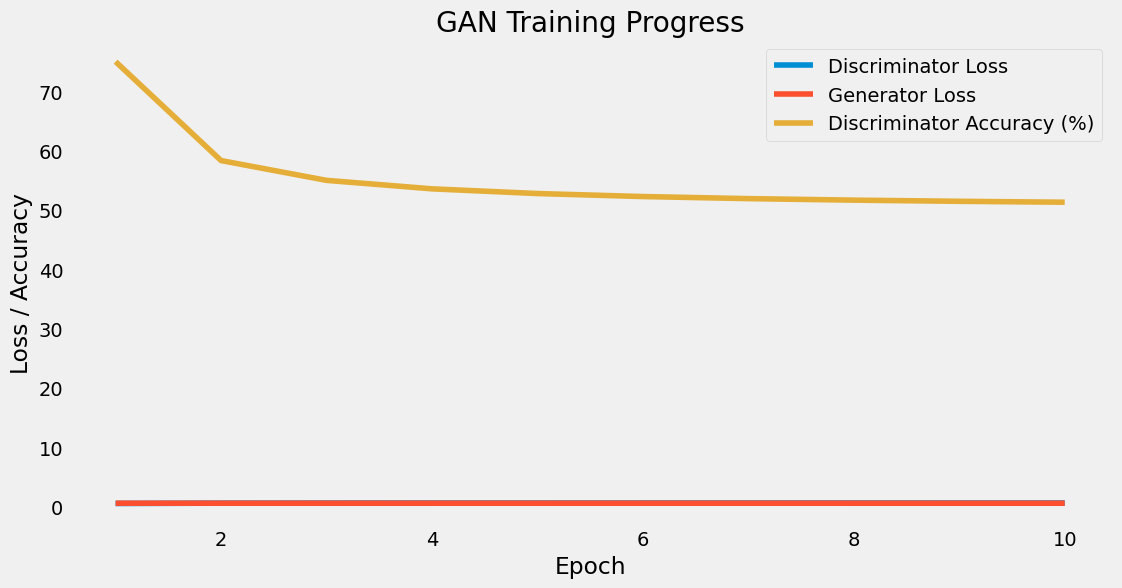

In [ ]:
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics["epoch"], metrics["critic_loss"], label="critic Loss")
plt.plot(metrics["epoch"], metrics["g_loss"], label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("GAN Training Progress")
plt.legend()
plt.grid()
plt.show()

In [ ]:
noise = np.random.normal(0, 1, (processed_data.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data = processed_data
print("Synthetic Data:")
print(synthetic_data)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Synthetic Data:
[[ 2.30610462  1.21501014  0.82077815 ... -0.06045801  0.6212719
  -1.01118489]
 [-0.52734983  1.21501014  0.82077815 ... -0.06271857  0.6212719
  -1.01118489]
 [-0.52735028 -0.79611125  1.69739757 ... -0.06271857  0.6212719
  -1.01118489]
 ...
 [-0.52067944 -0.79611125 -0.9324607  ... -0.06249252 -0.74979497
   0.98893883]
 [-0.52446946 -0.79611125 -0.9324607  ... -0.06113618 -0.74979497
   0.98893883]
 [-0.5204572  -0.79611125 -0.9324607  ... -0.06249252 -0.74979497
   0.98893883]]


In [ ]:
synthetic_data.shape

(1978, 9)

In [ ]:
X_train = synthetic_data[:,:-1]
y_train = synthetic_data[:,-1]

X_test = test_processed_data[:,:-1]
y_test = test_processed_data[:,-1]

In [ ]:
y_train = np.where(y_train >= 0.5, 1, 0)
y_test = np.where(y_test >= 0.5, 1, 0)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
np.unique(y_test)

array([0, 1])

In [ ]:
X_train.shape,X_test.shape

((1978, 8), (1978, 8))

In [ ]:
y_train.shape,y_test.shape

((1978,), (1978,))

In [ ]:
label = np.unique(y).tolist()
label

[0, 1]

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 2.1402482986450195
Prediction time (sec) = 0.0006489753723144531

Training score = 0.919881390593047
Testing score = 0.919881390593047

No of misclassified for class 0 (test data) = 55
No of misclassified for class 1 (test data) = 104
Total no of misclassified points (test data) = 159
Total % of misclassified points (test data) = 0.08038422649140546

Training log_loss = 0.18568434150773558
Testing log_loss = 0.18568434150773558

Confusion matrix:


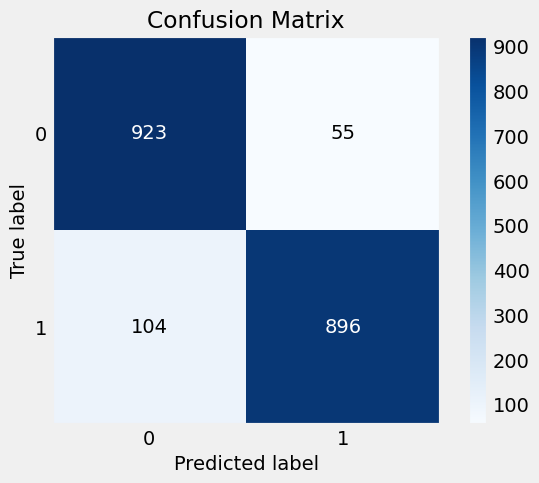

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       978
           1       0.94      0.90      0.92      1000

    accuracy                           0.92      1978
   macro avg       0.92      0.92      0.92      1978
weighted avg       0.92      0.92      0.92      1978

**************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.007673740386962891
Prediction time (sec) = 0.001604318618774414

Training score = 0.9193926380368098
Testing score = 0.9193926380368098

No of misclassified for class 0 (test data) = 54
No of misclassified for class 1 (test data) = 106
Total no of misclassified points (test data) = 160
Total % of misclassified points (test data) = 0.08088978766430738

Confusion matrix:


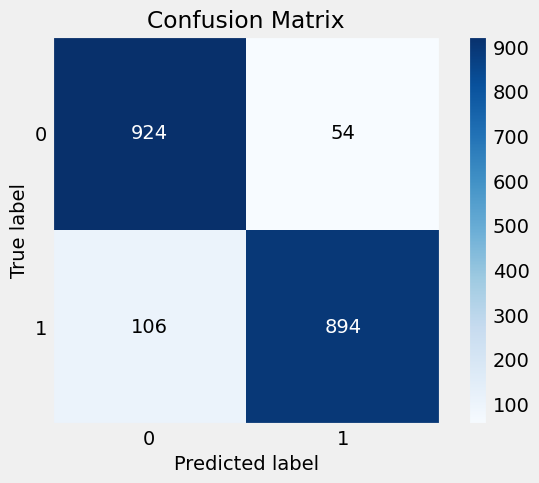

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       978
           1       0.94      0.89      0.92      1000

    accuracy                           0.92      1978
   macro avg       0.92      0.92      0.92      1978
weighted avg       0.92      0.92      0.92      1978

**************************************************************************


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.007721662521362305
Prediction time (sec) = 0.0005753040313720703

Training score = 0.9995
Testing score = 0.9995

No of misclassified for class 0 (test data) = 0
No of misclassified for class 1 (test data) = 1
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0005055611729019212

Training log_loss = 0.0009654737364071382
Testing log_loss = 0.0009654737364071382

Confusion matrix:


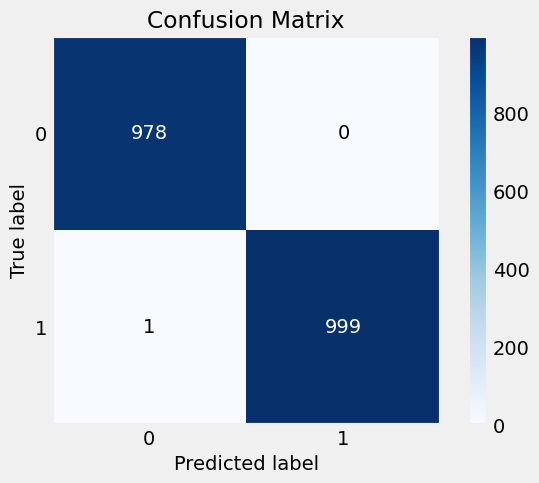

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978

**************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.295151948928833
Prediction time (sec) = 0.030030488967895508

Training score = 0.9995
Testing score = 0.9995

No of misclassified for class 0 (test data) = 0
No of misclassified for class 1 (test data) = 1
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0005055611729019212

Training log_loss = 0.0009654737364071401
Testing log_loss = 0.0009654737364071401

Confusion matrix:


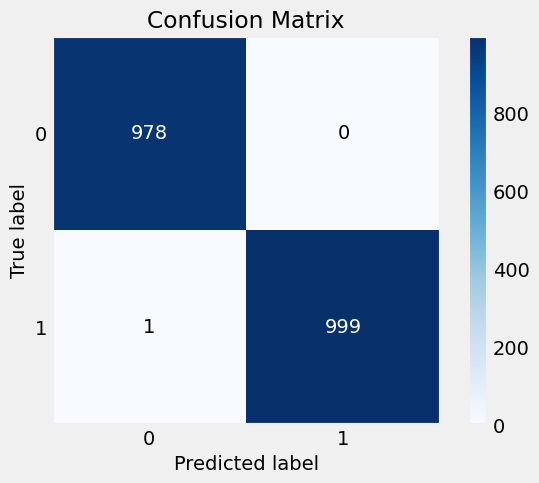

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978

**************************************************************************


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.39510679244995117
Prediction time (sec) = 0.024266958236694336

Training score = 0.9995
Testing score = 0.9995

No of misclassified for class 0 (test data) = 0
No of misclassified for class 1 (test data) = 1
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0005055611729019212

Training log_loss = 0.010244178277452944
Testing log_loss = 0.010244178277452944

Confusion matrix:


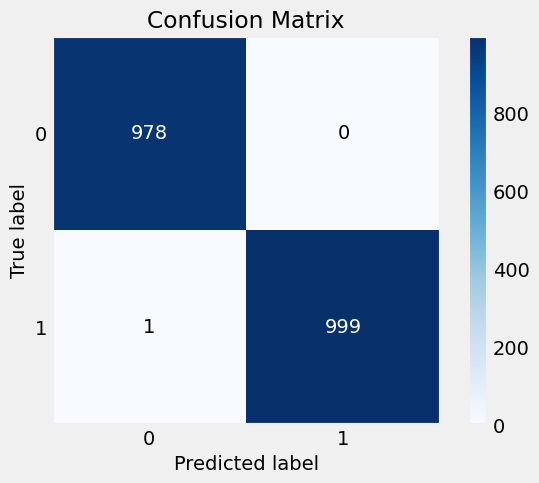

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978

**************************************************************************


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [ ]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.919881,0.919881,159,0.080384,0.185684,0.185684,2.140248,0.000649
1,LSVC,0.919393,0.919393,160,0.080890,NaN,NaN,0.007674,0.001604
2,DTC,0.999500,0.999500,1,0.000506,0.000965,0.000965,0.007722,0.000575
3,ETC,0.999500,0.999500,1,0.000506,0.000965,0.000965,0.295152,0.030030
4,RFC,0.999500,0.999500,1,0.000506,0.010244,0.010244,0.395107,0.024267


In [ ]:
scaler

StandardScaler()

In [ ]:
rfc

RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [ ]:
X

array([[-0.29818813,  0.70268154,  0.79032768, ..., -0.73406069,
         0.09964516, -1.30074557],
       [-0.29818664,  0.70268154,  0.79032768, ..., -0.73406069,
        -1.58939208, -0.21991643],
       [-0.2981879 ,  0.70268154,  0.79032768, ...,  0.48957959,
         1.66803689,  0.74082057],
       ...,
       [-0.29809392,  0.70268154,  0.79032768, ...,  0.48957959,
        -1.28777829,  0.08031388],
       [-0.29804271,  0.70268154,  0.79032768, ...,  0.48957959,
         0.88384103,  0.98100483],
       [-0.28574586, -1.39162644, -1.25461939, ..., -0.73406069,
         1.66803689,  0.20040601]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
np.save('synthetic_X.npy', X)
np.save('synthetic_y.npy', y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf /content/drive/MyDrive/save_data && mkdir -p /content/drive/MyDrive/save_data
!mv /content/synthetic_X.npy /content/drive/MyDrive/save_data/.
!mv /content/synthetic_y.npy /content/drive/MyDrive/save_data/.